In [1]:
import os,cv2
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# from keras import backend as K

# K.set_image_dim_ordering('th')

from keras.utils import np_utils
import keras


from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.optimizers import SGD
from keras import backend as K
K.set_image_dim_ordering('tf')
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array

/Users/sumitthorat/Documents/self_driving_car/venv/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
num_classes = 3

In [3]:
data_list = []
PATH = os.getcwd()
# Define data path
data_path = PATH + '/IOT_Project/training_images_raw_simple_2'
data_dir_list = os.listdir(data_path)

In [4]:
for datadir in data_dir_list:
    if not (datadir.endswith('.DS_Store') or datadir.endswith("l") or datadir.endswith("r")):
        images_in_dir = os.listdir(data_path + '/' + datadir)
        print("Size of " + str(datadir) + " : " + str(len(images_in_dir)))
        for single_image in images_in_dir:
            if single_image.endswith('.jpg'):
                input_img = cv2.imread(data_path + '/'+ datadir + '/'+ single_image, 0)
                input_img = input_img.reshape((38400))
                #input_img = img_to_array(input_img)
                data_list.append(input_img)
            else:
                print("Found 1 hidden in " + str(datadir))
                
len(data_list)

Size of fwd : 797
Found 1 hidden in fwd


Size of fwd_left : 411
Found 1 hidden in fwd_left


Size of fwd_right : 293
Found 1 hidden in fwd_right


1498

In [5]:
data_list = np.array(data_list, dtype='float') / 255.0
data_list.shape

(1498, 38400)

In [6]:
print(data_list)

[[0.43529412 0.43137255 0.43137255 ... 0.12941176 0.1254902  0.08627451]
 [0.43137255 0.43137255 0.43137255 ... 0.09803922 0.09411765 0.07058824]
 [0.61568627 0.61568627 0.61960784 ... 0.1372549  0.12941176 0.08627451]
 ...
 [0.56470588 0.56078431 0.55686275 ... 0.18039216 0.18039216 0.1372549 ]
 [0.51764706 0.51764706 0.51764706 ... 0.1254902  0.13333333 0.09803922]
 [0.57254902 0.57254902 0.56862745 ... 0.15686275 0.16078431 0.10980392]]


In [7]:
num_of_samples = data_list.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:796]=0
labels[796:1206]=1
labels[1206:]=2

Y = np_utils.to_categorical(labels, num_classes)



x,y = shuffle(data_list,Y, random_state=2)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(1198, 38400)
(300, 38400)
(1198, 3)
(300, 3)


In [9]:
model = Sequential()
model.add(Dense(units=32,activation="relu",input_shape=(38400,)))
model.add(Dense(units=32,activation="relu"))

model.add(Dense(units=3,activation="softmax"))

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
#model.compile(optimizer=adam,loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1228832   
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 1,229,987
Trainable params: 1,229,987
Non-trainable params: 0
_________________________________________________________________


In [10]:
hist = model.fit(X_train, y_train, batch_size=16, epochs=3 0, verbose=1, validation_data=(X_test, y_test))
#H = model.fit_generator(aug.flow(X_train, y_train, batch_size=BS), validation_data=(X_test, y_test), steps_per_epoch=len(X_train) // BS,epochs=EPOCHS, verbose=1)


Train on 1198 samples, validate on 300 samples
Epoch 1/30
  16/1198 [..............................] - ETA: 11s - loss: 1.0716 - acc: 0.4375

  96/1198 [=>............................] - ETA: 2s - loss: 1.0174 - acc: 0.5938 

 144/1198 [==>...........................] - ETA: 2s - loss: 1.0117 - acc: 0.5833

 176/1198 [===>..........................] - ETA: 2s - loss: 0.9983 - acc: 0.5795

 208/1198 [====>.........................] - ETA: 2s - loss: 0.9907 - acc: 0.5913

 256/1198 [=====>........................] - ETA: 1s - loss: 0.9962 - acc: 0.5820

 288/1198 [======>.......................] - ETA: 1s - loss: 0.9774 - acc: 0.6007

 320/1198 [=======>......................] - ETA: 1s - loss: 0.9661 - acc: 0.6031

 368/1198 [========>.....................] - ETA: 1s - loss: 0.9616 - acc: 0.5897

 416/1198 [=========>....................] - ETA: 1s - loss: 0.9522 - acc: 0.5841

 464/1198 [==========>...................] - ETA: 1s - loss: 0.9428 - acc: 0.5862

 512/1198 [===========>..................] - ETA: 1s - loss: 0.9271 - acc: 0.6016

 576/1198 [=============>................] - ETA: 0s - loss: 0.9193 - acc: 0.6042

 640/1198 [===============>..............] - ETA: 0s - loss: 0.9137 - acc: 0.6062

 704/1198 [================>.............] - ETA: 0s - loss: 0.9108 - acc: 0.6037

 768/1198 [==================>...........] - ETA: 0s - loss: 0.9046 - acc: 0.6094

 832/1198 [===================>..........] - ETA: 0s - loss: 0.9047 - acc: 0.6058

 896/1198 [=====================>........] - ETA: 0s - loss: 0.8991 - acc: 0.6038

 944/1198 [======================>.......] - ETA: 0s - loss: 0.8937 - acc: 0.6112

 976/1198 [=======================>......] - ETA: 0s - loss: 0.8853 - acc: 0.6168

1008/1198 [========================>.....] - ETA: 0s - loss: 0.8887 - acc: 0.6091

1056/1198 [=========================>....] - ETA: 0s - loss: 0.8860 - acc: 0.6098

1120/1198 [===========================>..] - ETA: 0s - loss: 0.8858 - acc: 0.6089

1184/1198 [============================>.] - ETA: 0s - loss: 0.8792 - acc: 0.6115

1198/1198 [==============================] - 2s 1ms/step - loss: 0.8789 - acc: 0.6110 - val_loss: 0.7667 - val_acc: 0.7000


Epoch 2/30
  16/1198 [..............................] - ETA: 1s - loss: 0.8719 - acc: 0.5625

  48/1198 [>.............................] - ETA: 1s - loss: 0.7635 - acc: 0.6458

  80/1198 [=>............................] - ETA: 1s - loss: 0.8070 - acc: 0.6375

 112/1198 [=>............................] - ETA: 1s - loss: 0.8180 - acc: 0.6250

 176/1198 [===>..........................] - ETA: 1s - loss: 0.8354 - acc: 0.5909

 240/1198 [=====>........................] - ETA: 1s - loss: 0.8202 - acc: 0.6042

 304/1198 [======>.......................] - ETA: 1s - loss: 0.8275 - acc: 0.6053

 368/1198 [========>.....................] - ETA: 0s - loss: 0.8185 - acc: 0.6114

 432/1198 [=========>....................] - ETA: 0s - loss: 0.8174 - acc: 0.6134

 496/1198 [===========>..................] - ETA: 0s - loss: 0.8033 - acc: 0.6270

 560/1198 [=============>................] - ETA: 0s - loss: 0.7955 - acc: 0.6321

 624/1198 [==============>...............] - ETA: 0s - loss: 0.7979 - acc: 0.6298

 688/1198 [================>.............] - ETA: 0s - loss: 0.7826 - acc: 0.6308

 752/1198 [=================>............] - ETA: 0s - loss: 0.7810 - acc: 0.6343

 816/1198 [===================>..........] - ETA: 0s - loss: 0.7678 - acc: 0.6434

 880/1198 [=====================>........] - ETA: 0s - loss: 0.7726 - acc: 0.6466

 944/1198 [======================>.......] - ETA: 0s - loss: 0.7803 - acc: 0.6462

1008/1198 [========================>.....] - ETA: 0s - loss: 0.7734 - acc: 0.6518

1072/1198 [=========================>....] - ETA: 0s - loss: 0.7746 - acc: 0.6539

1136/1198 [===========================>..] - ETA: 0s - loss: 0.7785 - acc: 0.6488

1198/1198 [==============================] - 1s 994us/step - loss: 0.7869 - acc: 0.6419 - val_loss: 0.7553 - val_acc: 0.6900


Epoch 3/30
  16/1198 [..............................] - ETA: 0s - loss: 0.6200 - acc: 0.8750

  64/1198 [>.............................] - ETA: 1s - loss: 0.7151 - acc: 0.7031

 112/1198 [=>............................] - ETA: 1s - loss: 0.8298 - acc: 0.6071

 144/1198 [==>...........................] - ETA: 1s - loss: 0.8208 - acc: 0.6042

 208/1198 [====>.........................] - ETA: 1s - loss: 0.8176 - acc: 0.6250

 272/1198 [=====>........................] - ETA: 1s - loss: 0.7865 - acc: 0.6618

 336/1198 [=======>......................] - ETA: 0s - loss: 0.7808 - acc: 0.6607

 400/1198 [=========>....................] - ETA: 0s - loss: 0.7749 - acc: 0.6675

 464/1198 [==========>...................] - ETA: 0s - loss: 0.7794 - acc: 0.6659

 512/1198 [===========>..................] - ETA: 0s - loss: 0.7783 - acc: 0.6699

 560/1198 [=============>................] - ETA: 0s - loss: 0.7773 - acc: 0.6732

 624/1198 [==============>...............] - ETA: 0s - loss: 0.7795 - acc: 0.6715

 688/1198 [================>.............] - ETA: 0s - loss: 0.7597 - acc: 0.6831

 752/1198 [=================>............] - ETA: 0s - loss: 0.7794 - acc: 0.6742

 816/1198 [===================>..........] - ETA: 0s - loss: 0.7759 - acc: 0.6679

 880/1198 [=====================>........] - ETA: 0s - loss: 0.7696 - acc: 0.6739

 944/1198 [======================>.......] - ETA: 0s - loss: 0.7711 - acc: 0.6695

1008/1198 [========================>.....] - ETA: 0s - loss: 0.7677 - acc: 0.6706

1072/1198 [=========================>....] - ETA: 0s - loss: 0.7632 - acc: 0.6744

1136/1198 [===========================>..] - ETA: 0s - loss: 0.7629 - acc: 0.6743

1198/1198 [==============================] - 1s 1ms/step - loss: 0.7644 - acc: 0.6720 - val_loss: 0.6932 - val_acc: 0.7333


Epoch 4/30


  16/1198 [..............................] - ETA: 0s - loss: 0.7004 - acc: 0.6875

  64/1198 [>.............................] - ETA: 1s - loss: 0.8194 - acc: 0.6094

  96/1198 [=>............................] - ETA: 1s - loss: 0.7640 - acc: 0.6875

 128/1198 [==>...........................] - ETA: 1s - loss: 0.7315 - acc: 0.6953

 192/1198 [===>..........................] - ETA: 1s - loss: 0.7294 - acc: 0.7083

 256/1198 [=====>........................] - ETA: 1s - loss: 0.7336 - acc: 0.7031

 320/1198 [=======>......................] - ETA: 0s - loss: 0.7252 - acc: 0.7125

 384/1198 [========>.....................] - ETA: 0s - loss: 0.7324 - acc: 0.7005

 448/1198 [==========>...................] - ETA: 0s - loss: 0.7345 - acc: 0.6875

 512/1198 [===========>..................] - ETA: 0s - loss: 0.7410 - acc: 0.6816

 576/1198 [=============>................] - ETA: 0s - loss: 0.7472 - acc: 0.6667

 640/1198 [===============>..............] - ETA: 0s - loss: 0.7424 - acc: 0.6703

 704/1198 [================>.............] - ETA: 0s - loss: 0.7456 - acc: 0.6634

 768/1198 [==================>...........] - ETA: 0s - loss: 0.7451 - acc: 0.6615

 832/1198 [===================>..........] - ETA: 0s - loss: 0.7560 - acc: 0.6575

 896/1198 [=====================>........] - ETA: 0s - loss: 0.7484 - acc: 0.6607

 960/1198 [=======================>......] - ETA: 0s - loss: 0.7498 - acc: 0.6594

1024/1198 [========================>.....] - ETA: 0s - loss: 0.7511 - acc: 0.6611

1088/1198 [==========================>...] - ETA: 0s - loss: 0.7496 - acc: 0.6627

1152/1198 [===========================>..] - ETA: 0s - loss: 0.7500 - acc: 0.6641

1198/1198 [==============================] - 1s 993us/step - loss: 0.7496 - acc: 0.6661 - val_loss: 0.6796 - val_acc: 0.7467


Epoch 5/30
  16/1198 [..............................] - ETA: 0s - loss: 0.6432 - acc: 0.6250

  64/1198 [>.............................] - ETA: 1s - loss: 0.7234 - acc: 0.6250

 112/1198 [=>............................] - ETA: 1s - loss: 0.7016 - acc: 0.6607

 176/1198 [===>..........................] - ETA: 1s - loss: 0.6755 - acc: 0.6932

 240/1198 [=====>........................] - ETA: 0s - loss: 0.7180 - acc: 0.6708

 304/1198 [======>.......................] - ETA: 0s - loss: 0.7049 - acc: 0.7039

 368/1198 [========>.....................] - ETA: 0s - loss: 0.7102 - acc: 0.7065

 432/1198 [=========>....................] - ETA: 0s - loss: 0.7229 - acc: 0.6898

 496/1198 [===========>..................] - ETA: 0s - loss: 0.7451 - acc: 0.6714

 560/1198 [=============>................] - ETA: 0s - loss: 0.7403 - acc: 0.6696

 624/1198 [==============>...............] - ETA: 0s - loss: 0.7340 - acc: 0.6715

 688/1198 [================>.............] - ETA: 0s - loss: 0.7271 - acc: 0.6773

 752/1198 [=================>............] - ETA: 0s - loss: 0.7329 - acc: 0.6729

 816/1198 [===================>..........] - ETA: 0s - loss: 0.7362 - acc: 0.6703

 880/1198 [=====================>........] - ETA: 0s - loss: 0.7429 - acc: 0.6636

 944/1198 [======================>.......] - ETA: 0s - loss: 0.7473 - acc: 0.6631

1008/1198 [========================>.....] - ETA: 0s - loss: 0.7507 - acc: 0.6597

1072/1198 [=========================>....] - ETA: 0s - loss: 0.7444 - acc: 0.6642

1136/1198 [===========================>..] - ETA: 0s - loss: 0.7479 - acc: 0.6646

1198/1198 [==============================] - 1s 951us/step - loss: 0.7476 - acc: 0.6694 - val_loss: 0.6693 - val_acc: 0.7367


Epoch 6/30
  16/1198 [..............................] - ETA: 0s - loss: 0.9003 - acc: 0.5625

  80/1198 [=>............................] - ETA: 1s - loss: 0.7881 - acc: 0.6625

 128/1198 [==>...........................] - ETA: 1s - loss: 0.7781 - acc: 0.6562

 176/1198 [===>..........................] - ETA: 1s - loss: 0.7629 - acc: 0.6477

 224/1198 [====>.........................] - ETA: 1s - loss: 0.7527 - acc: 0.6562

 288/1198 [======>.......................] - ETA: 0s - loss: 0.7635 - acc: 0.6597

 352/1198 [=======>......................] - ETA: 0s - loss: 0.7438 - acc: 0.6648

 416/1198 [=========>....................] - ETA: 0s - loss: 0.7353 - acc: 0.6803

 480/1198 [===========>..................] - ETA: 0s - loss: 0.7520 - acc: 0.6625

 544/1198 [============>.................] - ETA: 0s - loss: 0.7555 - acc: 0.6691

 608/1198 [==============>...............] - ETA: 0s - loss: 0.7462 - acc: 0.6727

 672/1198 [===============>..............] - ETA: 0s - loss: 0.7455 - acc: 0.6711

 736/1198 [=================>............] - ETA: 0s - loss: 0.7370 - acc: 0.6780

 800/1198 [===================>..........] - ETA: 0s - loss: 0.7403 - acc: 0.6787

 864/1198 [====================>.........] - ETA: 0s - loss: 0.7434 - acc: 0.6771

 928/1198 [======================>.......] - ETA: 0s - loss: 0.7434 - acc: 0.6746

 992/1198 [=======================>......] - ETA: 0s - loss: 0.7392 - acc: 0.6784

1056/1198 [=========================>....] - ETA: 0s - loss: 0.7354 - acc: 0.6809

1120/1198 [===========================>..] - ETA: 0s - loss: 0.7330 - acc: 0.6804

1184/1198 [============================>.] - ETA: 0s - loss: 0.7321 - acc: 0.6799

1198/1198 [==============================] - 1s 1ms/step - loss: 0.7333 - acc: 0.6770 - val_loss: 0.6777 - val_acc: 0.7367


Epoch 7/30
  16/1198 [..............................] - ETA: 1s - loss: 0.7597 - acc: 0.6250

  64/1198 [>.............................] - ETA: 1s - loss: 0.8484 - acc: 0.6406

 112/1198 [=>............................] - ETA: 1s - loss: 0.7974 - acc: 0.6696

 160/1198 [===>..........................] - ETA: 1s - loss: 0.7583 - acc: 0.6813

 224/1198 [====>.........................] - ETA: 1s - loss: 0.7421 - acc: 0.6920

 288/1198 [======>.......................] - ETA: 0s - loss: 0.7314 - acc: 0.6979

 352/1198 [=======>......................] - ETA: 0s - loss: 0.7191 - acc: 0.6903

 416/1198 [=========>....................] - ETA: 0s - loss: 0.7107 - acc: 0.6899

 480/1198 [===========>..................] - ETA: 0s - loss: 0.7139 - acc: 0.6833

 544/1198 [============>.................] - ETA: 0s - loss: 0.7121 - acc: 0.6893

 608/1198 [==============>...............] - ETA: 0s - loss: 0.7210 - acc: 0.6793

 672/1198 [===============>..............] - ETA: 0s - loss: 0.7184 - acc: 0.6786

 736/1198 [=================>............] - ETA: 0s - loss: 0.7157 - acc: 0.6739

 800/1198 [===================>..........] - ETA: 0s - loss: 0.7171 - acc: 0.6737

 864/1198 [====================>.........] - ETA: 0s - loss: 0.7156 - acc: 0.6759

 928/1198 [======================>.......] - ETA: 0s - loss: 0.7237 - acc: 0.6746

 992/1198 [=======================>......] - ETA: 0s - loss: 0.7350 - acc: 0.6734

1056/1198 [=========================>....] - ETA: 0s - loss: 0.7292 - acc: 0.6761

1120/1198 [===========================>..] - ETA: 0s - loss: 0.7279 - acc: 0.6768

1184/1198 [============================>.] - ETA: 0s - loss: 0.7303 - acc: 0.6774

1198/1198 [==============================] - 1s 1ms/step - loss: 0.7306 - acc: 0.6761 - val_loss: 0.6692 - val_acc: 0.7333


Epoch 8/30
  16/1198 [..............................] - ETA: 1s - loss: 0.4361 - acc: 0.8750

  64/1198 [>.............................] - ETA: 1s - loss: 0.5853 - acc: 0.7344

 112/1198 [=>............................] - ETA: 1s - loss: 0.6697 - acc: 0.7143

 176/1198 [===>..........................] - ETA: 1s - loss: 0.7185 - acc: 0.6705

 240/1198 [=====>........................] - ETA: 1s - loss: 0.7330 - acc: 0.6500

 304/1198 [======>.......................] - ETA: 0s - loss: 0.7196 - acc: 0.6711

 368/1198 [========>.....................] - ETA: 0s - loss: 0.7002 - acc: 0.6739

 432/1198 [=========>....................] - ETA: 0s - loss: 0.7033 - acc: 0.6759

 496/1198 [===========>..................] - ETA: 0s - loss: 0.6975 - acc: 0.6734

 560/1198 [=============>................] - ETA: 0s - loss: 0.7008 - acc: 0.6732

 624/1198 [==============>...............] - ETA: 0s - loss: 0.7159 - acc: 0.6667

 688/1198 [================>.............] - ETA: 0s - loss: 0.7157 - acc: 0.6657

 752/1198 [=================>............] - ETA: 0s - loss: 0.7169 - acc: 0.6676

 816/1198 [===================>..........] - ETA: 0s - loss: 0.7305 - acc: 0.6679

 880/1198 [=====================>........] - ETA: 0s - loss: 0.7348 - acc: 0.6670

 944/1198 [======================>.......] - ETA: 0s - loss: 0.7351 - acc: 0.6674

1008/1198 [========================>.....] - ETA: 0s - loss: 0.7343 - acc: 0.6667

1072/1198 [=========================>....] - ETA: 0s - loss: 0.7387 - acc: 0.6614

1136/1198 [===========================>..] - ETA: 0s - loss: 0.7367 - acc: 0.6629

1184/1198 [============================>.] - ETA: 0s - loss: 0.7324 - acc: 0.6672

1198/1198 [==============================] - 1s 1ms/step - loss: 0.7334 - acc: 0.6678 - val_loss: 0.6592 - val_acc: 0.7433


Epoch 9/30


  16/1198 [..............................] - ETA: 1s - loss: 0.5565 - acc: 0.7500

  64/1198 [>.............................] - ETA: 1s - loss: 0.7148 - acc: 0.6562

  96/1198 [=>............................] - ETA: 1s - loss: 0.7533 - acc: 0.6562

 144/1198 [==>...........................] - ETA: 1s - loss: 0.7719 - acc: 0.6319

 208/1198 [====>.........................] - ETA: 1s - loss: 0.7145 - acc: 0.6731

 272/1198 [=====>........................] - ETA: 1s - loss: 0.7401 - acc: 0.6654

 336/1198 [=======>......................] - ETA: 0s - loss: 0.7296 - acc: 0.6756

 400/1198 [=========>....................] - ETA: 0s - loss: 0.7210 - acc: 0.6750

 464/1198 [==========>...................] - ETA: 0s - loss: 0.7166 - acc: 0.6810

 528/1198 [============>.................] - ETA: 0s - loss: 0.7182 - acc: 0.6799

 592/1198 [=============>................] - ETA: 0s - loss: 0.7306 - acc: 0.6723

 656/1198 [===============>..............] - ETA: 0s - loss: 0.7369 - acc: 0.6677

 720/1198 [=================>............] - ETA: 0s - loss: 0.7340 - acc: 0.6667

 784/1198 [==================>...........] - ETA: 0s - loss: 0.7291 - acc: 0.6747

 848/1198 [====================>.........] - ETA: 0s - loss: 0.7223 - acc: 0.6733

 912/1198 [=====================>........] - ETA: 0s - loss: 0.7245 - acc: 0.6721

 976/1198 [=======================>......] - ETA: 0s - loss: 0.7215 - acc: 0.6742

1040/1198 [=========================>....] - ETA: 0s - loss: 0.7229 - acc: 0.6750

1104/1198 [==========================>...] - ETA: 0s - loss: 0.7205 - acc: 0.6793

1168/1198 [============================>.] - ETA: 0s - loss: 0.7270 - acc: 0.6764

1198/1198 [==============================] - 1s 1ms/step - loss: 0.7283 - acc: 0.6728 - val_loss: 0.6772 - val_acc: 0.7033


Epoch 10/30
  16/1198 [..............................] - ETA: 1s - loss: 0.7929 - acc: 0.6250

  64/1198 [>.............................] - ETA: 1s - loss: 0.8536 - acc: 0.6406

 112/1198 [=>............................] - ETA: 1s - loss: 0.8243 - acc: 0.6250

 176/1198 [===>..........................] - ETA: 1s - loss: 0.8188 - acc: 0.6250

 240/1198 [=====>........................] - ETA: 0s - loss: 0.8000 - acc: 0.6208

 304/1198 [======>.......................] - ETA: 0s - loss: 0.7861 - acc: 0.6250

 352/1198 [=======>......................] - ETA: 0s - loss: 0.7760 - acc: 0.6364

 416/1198 [=========>....................] - ETA: 0s - loss: 0.7724 - acc: 0.6418

 480/1198 [===========>..................] - ETA: 0s - loss: 0.7528 - acc: 0.6583

 544/1198 [============>.................] - ETA: 0s - loss: 0.7494 - acc: 0.6562

 608/1198 [==============>...............] - ETA: 0s - loss: 0.7441 - acc: 0.6612

 672/1198 [===============>..............] - ETA: 0s - loss: 0.7461 - acc: 0.6562

 736/1198 [=================>............] - ETA: 0s - loss: 0.7515 - acc: 0.6644

 800/1198 [===================>..........] - ETA: 0s - loss: 0.7497 - acc: 0.6625

 864/1198 [====================>.........] - ETA: 0s - loss: 0.7357 - acc: 0.6690

 928/1198 [======================>.......] - ETA: 0s - loss: 0.7266 - acc: 0.6735

 992/1198 [=======================>......] - ETA: 0s - loss: 0.7323 - acc: 0.6704

1056/1198 [=========================>....] - ETA: 0s - loss: 0.7298 - acc: 0.6723

1120/1198 [===========================>..] - ETA: 0s - loss: 0.7281 - acc: 0.6759

1168/1198 [============================>.] - ETA: 0s - loss: 0.7257 - acc: 0.6772

1198/1198 [==============================] - 1s 1ms/step - loss: 0.7216 - acc: 0.6795 - val_loss: 0.6532 - val_acc: 0.7500


Epoch 11/30
  16/1198 [..............................] - ETA: 1s - loss: 0.7192 - acc: 0.5625

  64/1198 [>.............................] - ETA: 1s - loss: 0.6267 - acc: 0.7031

 112/1198 [=>............................] - ETA: 1s - loss: 0.6552 - acc: 0.7143

 176/1198 [===>..........................] - ETA: 1s - loss: 0.6715 - acc: 0.7045

 240/1198 [=====>........................] - ETA: 1s - loss: 0.6671 - acc: 0.7083

 304/1198 [======>.......................] - ETA: 0s - loss: 0.6861 - acc: 0.7007

 368/1198 [========>.....................] - ETA: 0s - loss: 0.7213 - acc: 0.6658

 432/1198 [=========>....................] - ETA: 0s - loss: 0.7345 - acc: 0.6759

 496/1198 [===========>..................] - ETA: 0s - loss: 0.7361 - acc: 0.6754

 560/1198 [=============>................] - ETA: 0s - loss: 0.7391 - acc: 0.6714

 624/1198 [==============>...............] - ETA: 0s - loss: 0.7340 - acc: 0.6731

 688/1198 [================>.............] - ETA: 0s - loss: 0.7386 - acc: 0.6701

 752/1198 [=================>............] - ETA: 0s - loss: 0.7344 - acc: 0.6702

 816/1198 [===================>..........] - ETA: 0s - loss: 0.7390 - acc: 0.6642

 880/1198 [=====================>........] - ETA: 0s - loss: 0.7391 - acc: 0.6625

 944/1198 [======================>.......] - ETA: 0s - loss: 0.7346 - acc: 0.6674

1008/1198 [========================>.....] - ETA: 0s - loss: 0.7274 - acc: 0.6696

1072/1198 [=========================>....] - ETA: 0s - loss: 0.7193 - acc: 0.6744

1136/1198 [===========================>..] - ETA: 0s - loss: 0.7204 - acc: 0.6778

1184/1198 [============================>.] - ETA: 0s - loss: 0.7202 - acc: 0.6774

1198/1198 [==============================] - 1s 1ms/step - loss: 0.7184 - acc: 0.6778 - val_loss: 0.6571 - val_acc: 0.7467


Epoch 12/30
  16/1198 [..............................] - ETA: 1s - loss: 0.7242 - acc: 0.7500

  48/1198 [>.............................] - ETA: 1s - loss: 0.7008 - acc: 0.7083

  80/1198 [=>............................] - ETA: 1s - loss: 0.7732 - acc: 0.6625

 128/1198 [==>...........................] - ETA: 1s - loss: 0.7060 - acc: 0.7109

 192/1198 [===>..........................] - ETA: 1s - loss: 0.7122 - acc: 0.6927

 256/1198 [=====>........................] - ETA: 1s - loss: 0.6964 - acc: 0.7031

 320/1198 [=======>......................] - ETA: 0s - loss: 0.7010 - acc: 0.6844

 384/1198 [========>.....................] - ETA: 0s - loss: 0.7477 - acc: 0.6536

 448/1198 [==========>...................] - ETA: 0s - loss: 0.7498 - acc: 0.6540

 512/1198 [===========>..................] - ETA: 0s - loss: 0.7418 - acc: 0.6582

 576/1198 [=============>................] - ETA: 0s - loss: 0.7384 - acc: 0.6615

 640/1198 [===============>..............] - ETA: 0s - loss: 0.7261 - acc: 0.6687

 704/1198 [================>.............] - ETA: 0s - loss: 0.7240 - acc: 0.6705

 768/1198 [==================>...........] - ETA: 0s - loss: 0.7166 - acc: 0.6745

 832/1198 [===================>..........] - ETA: 0s - loss: 0.7322 - acc: 0.6695

 896/1198 [=====================>........] - ETA: 0s - loss: 0.7291 - acc: 0.6663

 960/1198 [=======================>......] - ETA: 0s - loss: 0.7306 - acc: 0.6625

1024/1198 [========================>.....] - ETA: 0s - loss: 0.7179 - acc: 0.6689

1088/1198 [==========================>...] - ETA: 0s - loss: 0.7237 - acc: 0.6682

1136/1198 [===========================>..] - ETA: 0s - loss: 0.7165 - acc: 0.6752

1184/1198 [============================>.] - ETA: 0s - loss: 0.7174 - acc: 0.6765

1198/1198 [==============================] - 1s 1ms/step - loss: 0.7191 - acc: 0.6761 - val_loss: 0.6611 - val_acc: 0.7367


Epoch 13/30
  16/1198 [..............................] - ETA: 1s - loss: 0.7430 - acc: 0.6250

  64/1198 [>.............................] - ETA: 1s - loss: 0.7158 - acc: 0.7344

 112/1198 [=>............................] - ETA: 1s - loss: 0.7845 - acc: 0.6696

 176/1198 [===>..........................] - ETA: 1s - loss: 0.7249 - acc: 0.6648

 240/1198 [=====>........................] - ETA: 0s - loss: 0.7056 - acc: 0.6667

 304/1198 [======>.......................] - ETA: 0s - loss: 0.7072 - acc: 0.6678

 368/1198 [========>.....................] - ETA: 0s - loss: 0.7159 - acc: 0.6630

 432/1198 [=========>....................] - ETA: 0s - loss: 0.7184 - acc: 0.6713

 496/1198 [===========>..................] - ETA: 0s - loss: 0.7166 - acc: 0.6734

 560/1198 [=============>................] - ETA: 0s - loss: 0.7186 - acc: 0.6714

 624/1198 [==============>...............] - ETA: 0s - loss: 0.7208 - acc: 0.6715

 688/1198 [================>.............] - ETA: 0s - loss: 0.7265 - acc: 0.6744

 752/1198 [=================>............] - ETA: 0s - loss: 0.7266 - acc: 0.6795

 800/1198 [===================>..........] - ETA: 0s - loss: 0.7378 - acc: 0.6737

 864/1198 [====================>.........] - ETA: 0s - loss: 0.7306 - acc: 0.6806

 928/1198 [======================>.......] - ETA: 0s - loss: 0.7218 - acc: 0.6875

 992/1198 [=======================>......] - ETA: 0s - loss: 0.7235 - acc: 0.6875

1056/1198 [=========================>....] - ETA: 0s - loss: 0.7204 - acc: 0.6903

1120/1198 [===========================>..] - ETA: 0s - loss: 0.7123 - acc: 0.6946

1168/1198 [============================>.] - ETA: 0s - loss: 0.7117 - acc: 0.6909

1198/1198 [==============================] - 1s 1ms/step - loss: 0.7106 - acc: 0.6920 - val_loss: 0.6487 - val_acc: 0.7467


Epoch 14/30
  16/1198 [..............................] - ETA: 1s - loss: 0.7350 - acc: 0.6875

  64/1198 [>.............................] - ETA: 1s - loss: 0.6656 - acc: 0.7344

 128/1198 [==>...........................] - ETA: 1s - loss: 0.7104 - acc: 0.7188

 192/1198 [===>..........................] - ETA: 1s - loss: 0.6812 - acc: 0.7240

 256/1198 [=====>........................] - ETA: 0s - loss: 0.6873 - acc: 0.7109

 320/1198 [=======>......................] - ETA: 0s - loss: 0.6808 - acc: 0.7000

 384/1198 [========>.....................] - ETA: 0s - loss: 0.6647 - acc: 0.7057

 448/1198 [==========>...................] - ETA: 0s - loss: 0.6735 - acc: 0.7098

 512/1198 [===========>..................] - ETA: 0s - loss: 0.6753 - acc: 0.7070

 576/1198 [=============>................] - ETA: 0s - loss: 0.6706 - acc: 0.7222

 640/1198 [===============>..............] - ETA: 0s - loss: 0.6712 - acc: 0.7156

 704/1198 [================>.............] - ETA: 0s - loss: 0.6663 - acc: 0.7173

 768/1198 [==================>...........] - ETA: 0s - loss: 0.6736 - acc: 0.7135

 832/1198 [===================>..........] - ETA: 0s - loss: 0.6822 - acc: 0.7103

 896/1198 [=====================>........] - ETA: 0s - loss: 0.6824 - acc: 0.7087

 960/1198 [=======================>......] - ETA: 0s - loss: 0.6881 - acc: 0.7052

1024/1198 [========================>.....] - ETA: 0s - loss: 0.7081 - acc: 0.6924

1088/1198 [==========================>...] - ETA: 0s - loss: 0.7128 - acc: 0.6912

1152/1198 [===========================>..] - ETA: 0s - loss: 0.7109 - acc: 0.6936

1198/1198 [==============================] - 1s 1ms/step - loss: 0.7106 - acc: 0.6920 - val_loss: 0.6553 - val_acc: 0.7200


Epoch 15/30
  16/1198 [..............................] - ETA: 1s - loss: 0.6026 - acc: 0.8750

  64/1198 [>.............................] - ETA: 1s - loss: 0.6843 - acc: 0.7031

 112/1198 [=>............................] - ETA: 1s - loss: 0.7123 - acc: 0.6964

 176/1198 [===>..........................] - ETA: 1s - loss: 0.7055 - acc: 0.6875

 240/1198 [=====>........................] - ETA: 0s - loss: 0.7214 - acc: 0.6917

 304/1198 [======>.......................] - ETA: 0s - loss: 0.6896 - acc: 0.7039

 368/1198 [========>.....................] - ETA: 0s - loss: 0.6896 - acc: 0.6902

 432/1198 [=========>....................] - ETA: 0s - loss: 0.6842 - acc: 0.7037

 496/1198 [===========>..................] - ETA: 0s - loss: 0.6793 - acc: 0.7077

 560/1198 [=============>................] - ETA: 0s - loss: 0.6833 - acc: 0.7000

 624/1198 [==============>...............] - ETA: 0s - loss: 0.6849 - acc: 0.6971

 688/1198 [================>.............] - ETA: 0s - loss: 0.6855 - acc: 0.6977

 752/1198 [=================>............] - ETA: 0s - loss: 0.6869 - acc: 0.6995

 816/1198 [===================>..........] - ETA: 0s - loss: 0.6850 - acc: 0.6998

 880/1198 [=====================>........] - ETA: 0s - loss: 0.6931 - acc: 0.6955

 944/1198 [======================>.......] - ETA: 0s - loss: 0.6986 - acc: 0.6917

1008/1198 [========================>.....] - ETA: 0s - loss: 0.7015 - acc: 0.6865

1072/1198 [=========================>....] - ETA: 0s - loss: 0.7111 - acc: 0.6800

1136/1198 [===========================>..] - ETA: 0s - loss: 0.7041 - acc: 0.6813

1184/1198 [============================>.] - ETA: 0s - loss: 0.7067 - acc: 0.6791

1198/1198 [==============================] - 1s 1ms/step - loss: 0.7083 - acc: 0.6795 - val_loss: 0.6580 - val_acc: 0.7233


Epoch 16/30


  16/1198 [..............................] - ETA: 1s - loss: 0.6456 - acc: 0.8125

  64/1198 [>.............................] - ETA: 1s - loss: 0.7330 - acc: 0.7188

 112/1198 [=>............................] - ETA: 1s - loss: 0.7098 - acc: 0.7143

 176/1198 [===>..........................] - ETA: 1s - loss: 0.6653 - acc: 0.7386

 240/1198 [=====>........................] - ETA: 1s - loss: 0.6860 - acc: 0.7250

 304/1198 [======>.......................] - ETA: 0s - loss: 0.7149 - acc: 0.7039

 368/1198 [========>.....................] - ETA: 0s - loss: 0.7078 - acc: 0.6929

 432/1198 [=========>....................] - ETA: 0s - loss: 0.6987 - acc: 0.7014

 496/1198 [===========>..................] - ETA: 0s - loss: 0.7016 - acc: 0.7016

 560/1198 [=============>................] - ETA: 0s - loss: 0.6915 - acc: 0.7089

 624/1198 [==============>...............] - ETA: 0s - loss: 0.6869 - acc: 0.7131

 688/1198 [================>.............] - ETA: 0s - loss: 0.7009 - acc: 0.7049

 752/1198 [=================>............] - ETA: 0s - loss: 0.6987 - acc: 0.7021

 816/1198 [===================>..........] - ETA: 0s - loss: 0.7013 - acc: 0.6973

 880/1198 [=====================>........] - ETA: 0s - loss: 0.6957 - acc: 0.6977

 944/1198 [======================>.......] - ETA: 0s - loss: 0.7041 - acc: 0.6949

1008/1198 [========================>.....] - ETA: 0s - loss: 0.7014 - acc: 0.6944

1072/1198 [=========================>....] - ETA: 0s - loss: 0.7106 - acc: 0.6922

1136/1198 [===========================>..] - ETA: 0s - loss: 0.7083 - acc: 0.6963

1184/1198 [============================>.] - ETA: 0s - loss: 0.7125 - acc: 0.6926

1198/1198 [==============================] - 1s 1ms/step - loss: 0.7107 - acc: 0.6937 - val_loss: 0.6509 - val_acc: 0.7300


Epoch 17/30


  16/1198 [..............................] - ETA: 1s - loss: 0.6554 - acc: 0.6250

  64/1198 [>.............................] - ETA: 1s - loss: 0.7409 - acc: 0.6875

  96/1198 [=>............................] - ETA: 1s - loss: 0.7839 - acc: 0.6875

 160/1198 [===>..........................] - ETA: 1s - loss: 0.7860 - acc: 0.6562

 224/1198 [====>.........................] - ETA: 1s - loss: 0.7527 - acc: 0.6830

 288/1198 [======>.......................] - ETA: 0s - loss: 0.7502 - acc: 0.6701

 352/1198 [=======>......................] - ETA: 0s - loss: 0.7410 - acc: 0.6733

 416/1198 [=========>....................] - ETA: 0s - loss: 0.7426 - acc: 0.6611

 480/1198 [===========>..................] - ETA: 0s - loss: 0.7424 - acc: 0.6750

 544/1198 [============>.................] - ETA: 0s - loss: 0.7411 - acc: 0.6710

 608/1198 [==============>...............] - ETA: 0s - loss: 0.7321 - acc: 0.6727

 672/1198 [===============>..............] - ETA: 0s - loss: 0.7335 - acc: 0.6726

 736/1198 [=================>............] - ETA: 0s - loss: 0.7318 - acc: 0.6671

 800/1198 [===================>..........] - ETA: 0s - loss: 0.7312 - acc: 0.6713

 864/1198 [====================>.........] - ETA: 0s - loss: 0.7251 - acc: 0.6771

 912/1198 [=====================>........] - ETA: 0s - loss: 0.7223 - acc: 0.6787

 976/1198 [=======================>......] - ETA: 0s - loss: 0.7131 - acc: 0.6855

1040/1198 [=========================>....] - ETA: 0s - loss: 0.7118 - acc: 0.6827

1104/1198 [==========================>...] - ETA: 0s - loss: 0.7060 - acc: 0.6875

1152/1198 [===========================>..] - ETA: 0s - loss: 0.7067 - acc: 0.6840

1198/1198 [==============================] - 1s 1ms/step - loss: 0.7078 - acc: 0.6845 - val_loss: 0.6491 - val_acc: 0.7267


Epoch 18/30
  16/1198 [..............................] - ETA: 1s - loss: 0.6323 - acc: 0.6875

  64/1198 [>.............................] - ETA: 1s - loss: 0.6229 - acc: 0.6875

 128/1198 [==>...........................] - ETA: 1s - loss: 0.6670 - acc: 0.7109

 192/1198 [===>..........................] - ETA: 1s - loss: 0.6895 - acc: 0.7031

 256/1198 [=====>........................] - ETA: 0s - loss: 0.6672 - acc: 0.7070

 320/1198 [=======>......................] - ETA: 0s - loss: 0.7229 - acc: 0.6875

 384/1198 [========>.....................] - ETA: 0s - loss: 0.7219 - acc: 0.6875

 448/1198 [==========>...................] - ETA: 0s - loss: 0.7035 - acc: 0.6987

 512/1198 [===========>..................] - ETA: 0s - loss: 0.7019 - acc: 0.6973

 560/1198 [=============>................] - ETA: 0s - loss: 0.7088 - acc: 0.6964

 624/1198 [==============>...............] - ETA: 0s - loss: 0.7061 - acc: 0.6955

 688/1198 [================>.............] - ETA: 0s - loss: 0.7107 - acc: 0.6904

 752/1198 [=================>............] - ETA: 0s - loss: 0.6990 - acc: 0.6968

 816/1198 [===================>..........] - ETA: 0s - loss: 0.7019 - acc: 0.6936

 880/1198 [=====================>........] - ETA: 0s - loss: 0.7016 - acc: 0.6932

 944/1198 [======================>.......] - ETA: 0s - loss: 0.7029 - acc: 0.6875

1008/1198 [========================>.....] - ETA: 0s - loss: 0.7024 - acc: 0.6855

1072/1198 [=========================>....] - ETA: 0s - loss: 0.7051 - acc: 0.6847

1136/1198 [===========================>..] - ETA: 0s - loss: 0.6990 - acc: 0.6893

1184/1198 [============================>.] - ETA: 0s - loss: 0.7056 - acc: 0.6875

1198/1198 [==============================] - 1s 1ms/step - loss: 0.7072 - acc: 0.6861 - val_loss: 0.6760 - val_acc: 0.7000


Epoch 19/30
  16/1198 [..............................] - ETA: 1s - loss: 0.9100 - acc: 0.5625

  64/1198 [>.............................] - ETA: 1s - loss: 0.7077 - acc: 0.6719

 112/1198 [=>............................] - ETA: 1s - loss: 0.7533 - acc: 0.6518

 176/1198 [===>..........................] - ETA: 1s - loss: 0.7103 - acc: 0.6705

 240/1198 [=====>........................] - ETA: 0s - loss: 0.6987 - acc: 0.6708

 304/1198 [======>.......................] - ETA: 0s - loss: 0.7199 - acc: 0.6612

 368/1198 [========>.....................] - ETA: 0s - loss: 0.7076 - acc: 0.6712

 432/1198 [=========>....................] - ETA: 0s - loss: 0.6994 - acc: 0.6782

 496/1198 [===========>..................] - ETA: 0s - loss: 0.7013 - acc: 0.6673

 560/1198 [=============>................] - ETA: 0s - loss: 0.7176 - acc: 0.6607

 624/1198 [==============>...............] - ETA: 0s - loss: 0.7088 - acc: 0.6667

 688/1198 [================>.............] - ETA: 0s - loss: 0.7073 - acc: 0.6744

 752/1198 [=================>............] - ETA: 0s - loss: 0.7159 - acc: 0.6742

 816/1198 [===================>..........] - ETA: 0s - loss: 0.7201 - acc: 0.6728

 880/1198 [=====================>........] - ETA: 0s - loss: 0.7217 - acc: 0.6705

 944/1198 [======================>.......] - ETA: 0s - loss: 0.7173 - acc: 0.6748

1008/1198 [========================>.....] - ETA: 0s - loss: 0.7103 - acc: 0.6786

1072/1198 [=========================>....] - ETA: 0s - loss: 0.7068 - acc: 0.6810

1136/1198 [===========================>..] - ETA: 0s - loss: 0.7076 - acc: 0.6769

1184/1198 [============================>.] - ETA: 0s - loss: 0.7049 - acc: 0.6807

1198/1198 [==============================] - 1s 1ms/step - loss: 0.7073 - acc: 0.6811 - val_loss: 0.6501 - val_acc: 0.7367


Epoch 20/30


  16/1198 [..............................] - ETA: 1s - loss: 0.7266 - acc: 0.6875

  48/1198 [>.............................] - ETA: 1s - loss: 0.6958 - acc: 0.7292

  96/1198 [=>............................] - ETA: 1s - loss: 0.6606 - acc: 0.7188

 144/1198 [==>...........................] - ETA: 1s - loss: 0.6922 - acc: 0.7014

 208/1198 [====>.........................] - ETA: 1s - loss: 0.7420 - acc: 0.6731

 272/1198 [=====>........................] - ETA: 1s - loss: 0.7518 - acc: 0.6581

 336/1198 [=======>......................] - ETA: 0s - loss: 0.7235 - acc: 0.6637

 400/1198 [=========>....................] - ETA: 0s - loss: 0.7168 - acc: 0.6700

 464/1198 [==========>...................] - ETA: 0s - loss: 0.7062 - acc: 0.6789

 528/1198 [============>.................] - ETA: 0s - loss: 0.6961 - acc: 0.6818

 592/1198 [=============>................] - ETA: 0s - loss: 0.6988 - acc: 0.6807

 656/1198 [===============>..............] - ETA: 0s - loss: 0.7044 - acc: 0.6753

 720/1198 [=================>............] - ETA: 0s - loss: 0.7201 - acc: 0.6722

 784/1198 [==================>...........] - ETA: 0s - loss: 0.7175 - acc: 0.6760

 848/1198 [====================>.........] - ETA: 0s - loss: 0.7081 - acc: 0.6804

 912/1198 [=====================>........] - ETA: 0s - loss: 0.7048 - acc: 0.6820

 976/1198 [=======================>......] - ETA: 0s - loss: 0.7144 - acc: 0.6783

1040/1198 [=========================>....] - ETA: 0s - loss: 0.7181 - acc: 0.6808

1104/1198 [==========================>...] - ETA: 0s - loss: 0.7122 - acc: 0.6857

1152/1198 [===========================>..] - ETA: 0s - loss: 0.7095 - acc: 0.6858

1198/1198 [==============================] - 1s 1ms/step - loss: 0.7053 - acc: 0.6895 - val_loss: 0.6536 - val_acc: 0.7333


Epoch 21/30
  16/1198 [..............................] - ETA: 0s - loss: 0.9844 - acc: 0.3750

  64/1198 [>.............................] - ETA: 1s - loss: 0.7826 - acc: 0.5938

 112/1198 [=>............................] - ETA: 1s - loss: 0.7760 - acc: 0.6429

 176/1198 [===>..........................] - ETA: 1s - loss: 0.7552 - acc: 0.6761

 240/1198 [=====>........................] - ETA: 0s - loss: 0.7602 - acc: 0.6833

 304/1198 [======>.......................] - ETA: 0s - loss: 0.7459 - acc: 0.6875

 368/1198 [========>.....................] - ETA: 0s - loss: 0.7462 - acc: 0.6848

 432/1198 [=========>....................] - ETA: 0s - loss: 0.7386 - acc: 0.6852

 496/1198 [===========>..................] - ETA: 0s - loss: 0.7325 - acc: 0.6835

 560/1198 [=============>................] - ETA: 0s - loss: 0.7177 - acc: 0.6946

 624/1198 [==============>...............] - ETA: 0s - loss: 0.7182 - acc: 0.6939

 688/1198 [================>.............] - ETA: 0s - loss: 0.7090 - acc: 0.7020

 752/1198 [=================>............] - ETA: 0s - loss: 0.7124 - acc: 0.6941

 816/1198 [===================>..........] - ETA: 0s - loss: 0.7070 - acc: 0.6961

 880/1198 [=====================>........] - ETA: 0s - loss: 0.7134 - acc: 0.6920

 944/1198 [======================>.......] - ETA: 0s - loss: 0.7103 - acc: 0.6928

1008/1198 [========================>.....] - ETA: 0s - loss: 0.7066 - acc: 0.6905

1072/1198 [=========================>....] - ETA: 0s - loss: 0.7041 - acc: 0.6922

1136/1198 [===========================>..] - ETA: 0s - loss: 0.7039 - acc: 0.6910

1184/1198 [============================>.] - ETA: 0s - loss: 0.7012 - acc: 0.6943

1198/1198 [==============================] - 1s 1ms/step - loss: 0.7001 - acc: 0.6928 - val_loss: 0.6785 - val_acc: 0.7067


Epoch 22/30


  16/1198 [..............................] - ETA: 1s - loss: 0.7846 - acc: 0.6875

  64/1198 [>.............................] - ETA: 1s - loss: 0.7141 - acc: 0.6562

 112/1198 [=>............................] - ETA: 1s - loss: 0.6919 - acc: 0.6518

 176/1198 [===>..........................] - ETA: 1s - loss: 0.6377 - acc: 0.6875

 240/1198 [=====>........................] - ETA: 0s - loss: 0.6524 - acc: 0.6625

 304/1198 [======>.......................] - ETA: 0s - loss: 0.6605 - acc: 0.6743

 368/1198 [========>.....................] - ETA: 0s - loss: 0.6685 - acc: 0.6658

 432/1198 [=========>....................] - ETA: 0s - loss: 0.6755 - acc: 0.6690

 496/1198 [===========>..................] - ETA: 0s - loss: 0.6887 - acc: 0.6653

 560/1198 [=============>................] - ETA: 0s - loss: 0.7023 - acc: 0.6607

 624/1198 [==============>...............] - ETA: 0s - loss: 0.6994 - acc: 0.6619

 688/1198 [================>.............] - ETA: 0s - loss: 0.7044 - acc: 0.6584

 752/1198 [=================>............] - ETA: 0s - loss: 0.7044 - acc: 0.6676

 816/1198 [===================>..........] - ETA: 0s - loss: 0.7039 - acc: 0.6740

 880/1198 [=====================>........] - ETA: 0s - loss: 0.7087 - acc: 0.6727

 944/1198 [======================>.......] - ETA: 0s - loss: 0.7063 - acc: 0.6769

1008/1198 [========================>.....] - ETA: 0s - loss: 0.7053 - acc: 0.6786

1072/1198 [=========================>....] - ETA: 0s - loss: 0.7011 - acc: 0.6810

1136/1198 [===========================>..] - ETA: 0s - loss: 0.6996 - acc: 0.6857

1184/1198 [============================>.] - ETA: 0s - loss: 0.7000 - acc: 0.6858

1198/1198 [==============================] - 1s 1ms/step - loss: 0.6998 - acc: 0.6845 - val_loss: 0.6491 - val_acc: 0.7433


Epoch 23/30


  16/1198 [..............................] - ETA: 1s - loss: 0.5419 - acc: 0.8750

  64/1198 [>.............................] - ETA: 1s - loss: 0.7053 - acc: 0.7188

 112/1198 [=>............................] - ETA: 1s - loss: 0.6462 - acc: 0.7054

 176/1198 [===>..........................] - ETA: 1s - loss: 0.6895 - acc: 0.6818

 240/1198 [=====>........................] - ETA: 1s - loss: 0.6588 - acc: 0.7000

 304/1198 [======>.......................] - ETA: 0s - loss: 0.6725 - acc: 0.6875

 368/1198 [========>.....................] - ETA: 0s - loss: 0.6881 - acc: 0.6875

 432/1198 [=========>....................] - ETA: 0s - loss: 0.6992 - acc: 0.6806

 496/1198 [===========>..................] - ETA: 0s - loss: 0.7172 - acc: 0.6694

 560/1198 [=============>................] - ETA: 0s - loss: 0.7112 - acc: 0.6786

 624/1198 [==============>...............] - ETA: 0s - loss: 0.7031 - acc: 0.6859

 688/1198 [================>.............] - ETA: 0s - loss: 0.7116 - acc: 0.6860

 752/1198 [=================>............] - ETA: 0s - loss: 0.7080 - acc: 0.6862

 816/1198 [===================>..........] - ETA: 0s - loss: 0.7073 - acc: 0.6875

 880/1198 [=====================>........] - ETA: 0s - loss: 0.6948 - acc: 0.6932

 944/1198 [======================>.......] - ETA: 0s - loss: 0.6925 - acc: 0.6939

1008/1198 [========================>.....] - ETA: 0s - loss: 0.6959 - acc: 0.6925

1072/1198 [=========================>....] - ETA: 0s - loss: 0.6978 - acc: 0.6922

1136/1198 [===========================>..] - ETA: 0s - loss: 0.6983 - acc: 0.6928

1184/1198 [============================>.] - ETA: 0s - loss: 0.6994 - acc: 0.6926

1198/1198 [==============================] - 1s 1ms/step - loss: 0.7011 - acc: 0.6912 - val_loss: 0.6500 - val_acc: 0.7200


Epoch 24/30
  16/1198 [..............................] - ETA: 1s - loss: 0.6014 - acc: 0.7500

  64/1198 [>.............................] - ETA: 1s - loss: 0.6069 - acc: 0.7188

 112/1198 [=>............................] - ETA: 1s - loss: 0.6383 - acc: 0.7143

 176/1198 [===>..........................] - ETA: 1s - loss: 0.6703 - acc: 0.7045

 240/1198 [=====>........................] - ETA: 0s - loss: 0.7007 - acc: 0.6833

 304/1198 [======>.......................] - ETA: 0s - loss: 0.6763 - acc: 0.7105

 368/1198 [========>.....................] - ETA: 0s - loss: 0.6800 - acc: 0.7038

 432/1198 [=========>....................] - ETA: 0s - loss: 0.6674 - acc: 0.7130

 496/1198 [===========>..................] - ETA: 0s - loss: 0.6828 - acc: 0.7077

 560/1198 [=============>................] - ETA: 0s - loss: 0.6960 - acc: 0.7018

 624/1198 [==============>...............] - ETA: 0s - loss: 0.7023 - acc: 0.6907

 688/1198 [================>.............] - ETA: 0s - loss: 0.7049 - acc: 0.6919

 752/1198 [=================>............] - ETA: 0s - loss: 0.7015 - acc: 0.6941

 816/1198 [===================>..........] - ETA: 0s - loss: 0.7043 - acc: 0.6900

 880/1198 [=====================>........] - ETA: 0s - loss: 0.7097 - acc: 0.6875

 944/1198 [======================>.......] - ETA: 0s - loss: 0.7185 - acc: 0.6801

1008/1198 [========================>.....] - ETA: 0s - loss: 0.7109 - acc: 0.6845

1072/1198 [=========================>....] - ETA: 0s - loss: 0.7126 - acc: 0.6838

1136/1198 [===========================>..] - ETA: 0s - loss: 0.7076 - acc: 0.6840

1184/1198 [============================>.] - ETA: 0s - loss: 0.7053 - acc: 0.6858

1198/1198 [==============================] - 1s 1ms/step - loss: 0.7036 - acc: 0.6878 - val_loss: 0.6440 - val_acc: 0.7400


Epoch 25/30


  16/1198 [..............................] - ETA: 1s - loss: 0.9015 - acc: 0.4375

  64/1198 [>.............................] - ETA: 1s - loss: 0.6993 - acc: 0.6406

 112/1198 [=>............................] - ETA: 1s - loss: 0.6843 - acc: 0.6518

 176/1198 [===>..........................] - ETA: 1s - loss: 0.6842 - acc: 0.6932

 240/1198 [=====>........................] - ETA: 1s - loss: 0.6973 - acc: 0.6958

 304/1198 [======>.......................] - ETA: 0s - loss: 0.6826 - acc: 0.7138

 368/1198 [========>.....................] - ETA: 0s - loss: 0.7096 - acc: 0.7038

 432/1198 [=========>....................] - ETA: 0s - loss: 0.6999 - acc: 0.7083

 496/1198 [===========>..................] - ETA: 0s - loss: 0.6984 - acc: 0.7056

 560/1198 [=============>................] - ETA: 0s - loss: 0.6877 - acc: 0.7054

 624/1198 [==============>...............] - ETA: 0s - loss: 0.6736 - acc: 0.7099

 688/1198 [================>.............] - ETA: 0s - loss: 0.6821 - acc: 0.7006

 752/1198 [=================>............] - ETA: 0s - loss: 0.6743 - acc: 0.7114

 816/1198 [===================>..........] - ETA: 0s - loss: 0.6719 - acc: 0.7083

 880/1198 [=====================>........] - ETA: 0s - loss: 0.6849 - acc: 0.6977

 944/1198 [======================>.......] - ETA: 0s - loss: 0.6899 - acc: 0.6970

1008/1198 [========================>.....] - ETA: 0s - loss: 0.6956 - acc: 0.6935

1072/1198 [=========================>....] - ETA: 0s - loss: 0.6907 - acc: 0.6950

1136/1198 [===========================>..] - ETA: 0s - loss: 0.6965 - acc: 0.6919

1184/1198 [============================>.] - ETA: 0s - loss: 0.6944 - acc: 0.6926

1198/1198 [==============================] - 1s 1ms/step - loss: 0.6942 - acc: 0.6928 - val_loss: 0.6447 - val_acc: 0.7333


Epoch 26/30
  16/1198 [..............................] - ETA: 0s - loss: 0.9274 - acc: 0.6250

  64/1198 [>.............................] - ETA: 1s - loss: 0.6521 - acc: 0.7031

 112/1198 [=>............................] - ETA: 1s - loss: 0.6665 - acc: 0.7143

 160/1198 [===>..........................] - ETA: 1s - loss: 0.6966 - acc: 0.7312

 208/1198 [====>.........................] - ETA: 1s - loss: 0.6854 - acc: 0.7260

 256/1198 [=====>........................] - ETA: 1s - loss: 0.6877 - acc: 0.7266

 320/1198 [=======>......................] - ETA: 0s - loss: 0.7003 - acc: 0.7031

 384/1198 [========>.....................] - ETA: 0s - loss: 0.7147 - acc: 0.6953

 448/1198 [==========>...................] - ETA: 0s - loss: 0.7163 - acc: 0.6853

 512/1198 [===========>..................] - ETA: 0s - loss: 0.7040 - acc: 0.6855

 576/1198 [=============>................] - ETA: 0s - loss: 0.6927 - acc: 0.6875

 640/1198 [===============>..............] - ETA: 0s - loss: 0.6949 - acc: 0.6797

 704/1198 [================>.............] - ETA: 0s - loss: 0.6986 - acc: 0.6776

 768/1198 [==================>...........] - ETA: 0s - loss: 0.6982 - acc: 0.6745

 832/1198 [===================>..........] - ETA: 0s - loss: 0.7121 - acc: 0.6695

 896/1198 [=====================>........] - ETA: 0s - loss: 0.7006 - acc: 0.6763

 960/1198 [=======================>......] - ETA: 0s - loss: 0.6993 - acc: 0.6792

1024/1198 [========================>.....] - ETA: 0s - loss: 0.6950 - acc: 0.6777

1088/1198 [==========================>...] - ETA: 0s - loss: 0.6955 - acc: 0.6820

1136/1198 [===========================>..] - ETA: 0s - loss: 0.6947 - acc: 0.6813

1184/1198 [============================>.] - ETA: 0s - loss: 0.6929 - acc: 0.6824

1198/1198 [==============================] - 1s 1ms/step - loss: 0.6950 - acc: 0.6828 - val_loss: 0.6467 - val_acc: 0.7433


Epoch 27/30
  16/1198 [..............................] - ETA: 0s - loss: 0.5534 - acc: 0.8125

  64/1198 [>.............................] - ETA: 1s - loss: 0.7605 - acc: 0.6719

 112/1198 [=>............................] - ETA: 1s - loss: 0.6922 - acc: 0.7054

 176/1198 [===>..........................] - ETA: 1s - loss: 0.6363 - acc: 0.7216

 240/1198 [=====>........................] - ETA: 0s - loss: 0.6340 - acc: 0.7125

 304/1198 [======>.......................] - ETA: 0s - loss: 0.6786 - acc: 0.6908

 368/1198 [========>.....................] - ETA: 0s - loss: 0.6638 - acc: 0.6957

 432/1198 [=========>....................] - ETA: 0s - loss: 0.6760 - acc: 0.6875

 496/1198 [===========>..................] - ETA: 0s - loss: 0.6704 - acc: 0.6915

 560/1198 [=============>................] - ETA: 0s - loss: 0.6704 - acc: 0.6875

 624/1198 [==============>...............] - ETA: 0s - loss: 0.6933 - acc: 0.6843

 688/1198 [================>.............] - ETA: 0s - loss: 0.6948 - acc: 0.6846

 752/1198 [=================>............] - ETA: 0s - loss: 0.6920 - acc: 0.6862

 816/1198 [===================>..........] - ETA: 0s - loss: 0.6984 - acc: 0.6826

 880/1198 [=====================>........] - ETA: 0s - loss: 0.6858 - acc: 0.6898

 944/1198 [======================>.......] - ETA: 0s - loss: 0.6832 - acc: 0.6907

1008/1198 [========================>.....] - ETA: 0s - loss: 0.6849 - acc: 0.6895

1072/1198 [=========================>....] - ETA: 0s - loss: 0.6923 - acc: 0.6875

1136/1198 [===========================>..] - ETA: 0s - loss: 0.6943 - acc: 0.6857

1184/1198 [============================>.] - ETA: 0s - loss: 0.6962 - acc: 0.6841

1198/1198 [==============================] - 1s 1ms/step - loss: 0.6966 - acc: 0.6836 - val_loss: 0.6459 - val_acc: 0.7500


Epoch 28/30


  16/1198 [..............................] - ETA: 0s - loss: 0.5459 - acc: 0.8125

  64/1198 [>.............................] - ETA: 1s - loss: 0.5572 - acc: 0.7188

 112/1198 [=>............................] - ETA: 1s - loss: 0.5704 - acc: 0.7411

 176/1198 [===>..........................] - ETA: 1s - loss: 0.6190 - acc: 0.7216

 240/1198 [=====>........................] - ETA: 0s - loss: 0.6439 - acc: 0.7250

 304/1198 [======>.......................] - ETA: 0s - loss: 0.6528 - acc: 0.7237

 368/1198 [========>.....................] - ETA: 0s - loss: 0.6744 - acc: 0.7147

 432/1198 [=========>....................] - ETA: 0s - loss: 0.6900 - acc: 0.7083

 496/1198 [===========>..................] - ETA: 0s - loss: 0.6713 - acc: 0.7198

 560/1198 [=============>................] - ETA: 0s - loss: 0.6816 - acc: 0.7107

 624/1198 [==============>...............] - ETA: 0s - loss: 0.6799 - acc: 0.7131

 688/1198 [================>.............] - ETA: 0s - loss: 0.6755 - acc: 0.7093

 752/1198 [=================>............] - ETA: 0s - loss: 0.6805 - acc: 0.7088

 816/1198 [===================>..........] - ETA: 0s - loss: 0.6781 - acc: 0.7083

 880/1198 [=====================>........] - ETA: 0s - loss: 0.6819 - acc: 0.7080

 944/1198 [======================>.......] - ETA: 0s - loss: 0.6946 - acc: 0.7034

1008/1198 [========================>.....] - ETA: 0s - loss: 0.6953 - acc: 0.6994

1072/1198 [=========================>....] - ETA: 0s - loss: 0.7039 - acc: 0.6931

1136/1198 [===========================>..] - ETA: 0s - loss: 0.6987 - acc: 0.6937

1168/1198 [============================>.] - ETA: 0s - loss: 0.6966 - acc: 0.6943

1198/1198 [==============================] - 1s 1ms/step - loss: 0.6941 - acc: 0.6962 - val_loss: 0.6530 - val_acc: 0.7367


Epoch 29/30


  16/1198 [..............................] - ETA: 0s - loss: 0.9892 - acc: 0.7500

  64/1198 [>.............................] - ETA: 1s - loss: 0.7949 - acc: 0.6875

 112/1198 [=>............................] - ETA: 1s - loss: 0.7403 - acc: 0.7054

 176/1198 [===>..........................] - ETA: 1s - loss: 0.7146 - acc: 0.7102

 240/1198 [=====>........................] - ETA: 0s - loss: 0.6718 - acc: 0.7167

 304/1198 [======>.......................] - ETA: 0s - loss: 0.6744 - acc: 0.7072

 368/1198 [========>.....................] - ETA: 0s - loss: 0.6847 - acc: 0.7011

 432/1198 [=========>....................] - ETA: 0s - loss: 0.6893 - acc: 0.6991

 496/1198 [===========>..................] - ETA: 0s - loss: 0.6963 - acc: 0.6956

 560/1198 [=============>................] - ETA: 0s - loss: 0.6771 - acc: 0.7089

 624/1198 [==============>...............] - ETA: 0s - loss: 0.6803 - acc: 0.6987

 688/1198 [================>.............] - ETA: 0s - loss: 0.6843 - acc: 0.6904

 752/1198 [=================>............] - ETA: 0s - loss: 0.6846 - acc: 0.6928

 816/1198 [===================>..........] - ETA: 0s - loss: 0.6882 - acc: 0.6863

 880/1198 [=====================>........] - ETA: 0s - loss: 0.6902 - acc: 0.6898

 944/1198 [======================>.......] - ETA: 0s - loss: 0.6888 - acc: 0.6907

1008/1198 [========================>.....] - ETA: 0s - loss: 0.6988 - acc: 0.6905

1072/1198 [=========================>....] - ETA: 0s - loss: 0.6929 - acc: 0.6968

1136/1198 [===========================>..] - ETA: 0s - loss: 0.6901 - acc: 0.6989

1184/1198 [============================>.] - ETA: 0s - loss: 0.6886 - acc: 0.6968

1198/1198 [==============================] - 1s 1ms/step - loss: 0.6909 - acc: 0.6970 - val_loss: 0.6466 - val_acc: 0.7267


Epoch 30/30


  16/1198 [..............................] - ETA: 0s - loss: 0.4520 - acc: 0.8750

  64/1198 [>.............................] - ETA: 1s - loss: 0.6501 - acc: 0.7500

 112/1198 [=>............................] - ETA: 1s - loss: 0.6559 - acc: 0.7143

 176/1198 [===>..........................] - ETA: 1s - loss: 0.6625 - acc: 0.6875

 240/1198 [=====>........................] - ETA: 1s - loss: 0.6899 - acc: 0.6708

 304/1198 [======>.......................] - ETA: 0s - loss: 0.6869 - acc: 0.6678

 368/1198 [========>.....................] - ETA: 0s - loss: 0.6898 - acc: 0.6658

 432/1198 [=========>....................] - ETA: 0s - loss: 0.6964 - acc: 0.6782

 496/1198 [===========>..................] - ETA: 0s - loss: 0.6972 - acc: 0.6794

 560/1198 [=============>................] - ETA: 0s - loss: 0.6965 - acc: 0.6911

 624/1198 [==============>...............] - ETA: 0s - loss: 0.6960 - acc: 0.6811

 688/1198 [================>.............] - ETA: 0s - loss: 0.6888 - acc: 0.6860

 752/1198 [=================>............] - ETA: 0s - loss: 0.6877 - acc: 0.6888

 816/1198 [===================>..........] - ETA: 0s - loss: 0.6873 - acc: 0.6850

 880/1198 [=====================>........] - ETA: 0s - loss: 0.6866 - acc: 0.6886

 944/1198 [======================>.......] - ETA: 0s - loss: 0.6883 - acc: 0.6907

1008/1198 [========================>.....] - ETA: 0s - loss: 0.6954 - acc: 0.6865

1072/1198 [=========================>....] - ETA: 0s - loss: 0.6898 - acc: 0.6912

1136/1198 [===========================>..] - ETA: 0s - loss: 0.6920 - acc: 0.6937

1184/1198 [============================>.] - ETA: 0s - loss: 0.6928 - acc: 0.6934

1198/1198 [==============================] - 1s 1ms/step - loss: 0.6920 - acc: 0.6945 - val_loss: 0.6670 - val_acc: 0.7200


In [11]:

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

('Test Loss:', 0.6669535422325135)
('Test accuracy:', 0.7200000007947286)


In [12]:
model.save("65_simple_acc_2.h5")

In [28]:
test_image = data_list[54].reshape((120, 320))


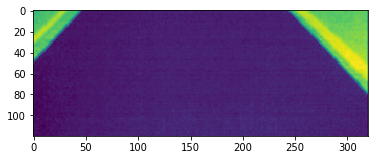

In [73]:
plt.imshow(test_image)

In [74]:
#img_class = model.predict_classes(data_list[22])
#prediction = img_class[0]
#data_list[22].shape

In [75]:
#img_class = model.predict(data_list[22])
test_image = cv2.imread("IOT_Project/training_images_raw/fwd/20180326-223720.jpg", 0)

In [76]:
test_image = test_image.reshape((38400))

In [77]:
test_image = np.array(test_image, dtype="float") / 255.0

In [78]:
test_image = np.expand_dims(test_image, axis= 0)


In [79]:
print(test_image.shape)

(1, 38400)


In [80]:
prediction = model.predict_classes(test_image)
if prediction == 0:
    print("Fwd")
elif prediction == 1:
    print("Left")
else:
    print("Right")


Fwd
